In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set_theme(context="notebook", style="whitegrid")

In [17]:
## generating paths
sample_ID="ERR1898482" ##sample1, ERR1898482, "ERR1898484", "ERR13935197"
IN_DIR = os.path.join("../../data", "processed")
IN_PATH = os.path.join(IN_DIR, f"{sample_ID}_airr.tsv")

OUT_DIR = os.path.join("../../results", sample_ID)
os.makedirs(OUT_DIR, exist_ok=True)
IN_PATH, OUT_DIR

('../../data/processed/ERR1898482_airr.tsv', '../../results/ERR1898482')

In [18]:
## Load the airr table
airr = pd.read_csv(IN_PATH, sep="\t")
airr.head()

,sequence_id,sequence,rev_comp,productive,locus,v_call,d_call,j_call,c_call,sequence_alignment,...,junction_aa,v_cigar,d_cigar,j_cigar,c_cigar,v_identity,j_identity,cell_id,complete_vdj,consensus_count
0,assemble0_0,GGGAGGAACTGCTCAGTTAGGACCCAGACGGAACCATGGAAGCCCC...,F,T,IGK,IGKV3D-15*01,NaN,IGKJ1*01,IGKC,GAAATAGTGATGACGCAGTCTCCAGCCACCCTGTCTGTGTCTCCAG...,...,CQQYNNWPPWTF,95S287M308S,NaN,382S38M270S,420S270M253N,98.61,94.12,NaN,T,117
1,assemble0_1,GGGAGGAACTGCTCAGTTAGGACCCAGACGGAACCATGGAAGCCCC...,F,T,IGK,IGKV3D-15*01,NaN,IGKJ1*01,IGKC,GAAATAGTGATGACGCAGTCTCCAGCCACCCTGTCTGTGTCTCCAG...,...,CQQYNNWPPWTF,95S287M308S,NaN,382S38M270S,420S270M253N,98.61,94.12,NaN,T,5
2,assemble2_0,GGGGTCTCAGGAGGCAGCGCTCTCGGGACGTCTCCACCATGGCCTG...,F,T,IGL,IGLV2-14*01,NaN,IGLJ3*02,IGLC5,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,...,CSSYTSSSTWVF,95S294M123S3N,NaN,388S38M86S,462S146N50M97N,94.58,100.00,NaN,T,241
3,assemble2_1,GGGGTCTCAGGAGGCAGCGCTCTCGGGACGTCTCCACCATGGCCTG...,F,T,IGL,IGLV2-14*01,NaN,IGLJ3*02,IGLC5,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,...,CTSYTSSNTWVF,95S294M123S3N,NaN,388S38M86S,462S146N50M97N,94.58,100.00,NaN,T,8
4,assemble2_2,GGGGTCTCAGGAGGCAGCGCTCTCGGGACGTCTCCACCATGGCCTG...,F,T,IGL,IGLV2-14*01,NaN,IGLJ3*02,IGLC5,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,...,CSSYTSSSTLVF,95S294M123S3N,NaN,388S38M86S,462S146N50M97N,94.58,100.00,NaN,T,7


In [14]:
## Keep only BCR
airr["locus"] = airr["locus"].astype(str).str.upper().str.strip()
bcr=airr[(airr["locus"].isin(["IGH", "IGK", "IGL"])) &
         (airr["productive"])].copy()

len(airr), len(bcr), bcr["locus"].value_counts()

(1002,
 1002,
 locus
 IGK    520
 IGL    297
 IGH    185
 Name: count, dtype: int64)

In [19]:
## Clean the bcr data
import numpy as np
bcr["consensus_count"] = pd.to_numeric(bcr["consensus_count"], errors="coerce").fillna(0).astype(int)
total = bcr["consensus_count"].sum()
bcr["frequency"] = (bcr["consensus_count"]/total) if total > 0 else 0.0
bcr_min = bcr.rename(columns={
    "junction_aa" : "CDR3aa",
    "junction": "CDR3nt",
    "v_call" : "V",
    "d_call" : "D",
    "j_call" : "J",
    "c_call" : "C",
    "consensus_count" : "count"
})[["sequence_id","locus","CDR3aa","CDR3nt","V","D","J","C","count","frequency"]]

bcr_min.head(10)

,sequence_id,locus,CDR3aa,CDR3nt,V,D,J,C,count,frequency
0,assemble0_0,IGL,CQAWDSSTVVF,TGTCAGGCGTGGGACAGCAGCACTGTGGTATTC,IGLV3-1*01,NaN,IGLJ2*01|IGLJ3*01,IGLC2,299,0.017479
1,assemble0_1,IGL,CQAWDSTTVVF,TGTCAGGCGTGGGACAGCACCACTGTGGTATTC,IGLV3-1*01,NaN,IGLJ2*01|IGLJ3*01,IGLC2,33,0.001929
2,assemble0_2,IGL,CQAWDGSTVVF,TGTCAGGCGTGGGACGGCAGCACTGTGGTATTC,IGLV3-1*01,NaN,IGLJ2*01|IGLJ3*01,IGLC2,26,0.001520
3,assemble0_3,IGL,CQAWDSSHVVF,TGTCAGGCGTGGGACAGCAGCCATGTGGTATTC,IGLV3-1*01,NaN,IGLJ2*01|IGLJ3*01,IGLC2,9,0.000526
4,assemble1_0,IGH,CARDLANYDFWNGYNGDGFDHW,TGTGCGAGAGATTTGGCGAATTACGATTTTTGGAATGGTTACAATG...,IGHV4-61*02,IGHD3-3*01,IGHJ5*02,IGHA1,101,0.005904
5,assemble2_0,IGK,CQQYGSSPKTF,TGTCAGCAGTATGGTAGCTCACCTAAGACGTTC,IGKV3-20*01,NaN,IGKJ1*01,IGKC,268,0.015667
6,assemble2_1,IGK,CQQYGSSPWTF,TGTCAGCAGTATGGTAGCTCACCGTGGACGTTC,IGKV3-20*01,NaN,IGKJ1*01,IGKC,46,0.002689
7,assemble2_2,IGK,CQQYGGSPQTF,TGTCAGCAGTATGGTGGCTCACCTCAGACGTTC,IGKV3-20*01,NaN,IGKJ1*01,IGKC,44,0.002572
8,assemble2_3,IGK,CQQYGSSPRTF,TGTCAGCAGTATGGTAGCTCACCTAGGACGTTC,IGKV3-20*01,NaN,IGKJ1*01,IGKC,40,0.002338
9,assemble2_4,IGK,CQQYGSSPLTF,TGTCAGCAGTATGGTAGCTCACCTCTCACTTTC,IGKV3-20*01,NaN,IGKJ1*01,IGKC,11,0.000643


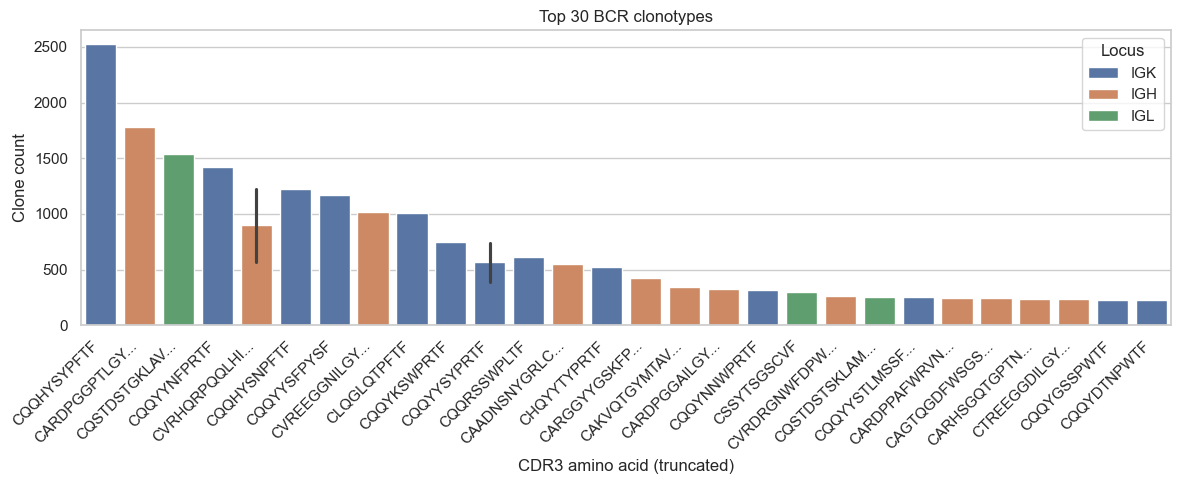

In [165]:
## Plots clonotypes
top = bcr_min.sort_values("count", ascending=False).head(30).copy()
top["CDR3aa_short"]=top["CDR3aa"].fillna("").apply(lambda s : s if len(s)<12 else s[:12] + "...")

plt.figure(figsize=(12,5))
sns.barplot(top, y="count", x="CDR3aa_short", hue="locus", dodge=False)
plt.xticks(rotation=45, ha="right")
plt.xlabel("CDR3 amino acid (truncated)")
plt.ylabel("Clone count")
plt.title("Top 30 BCR clonotypes")
plt.legend(title="Locus")
plt.tight_layout()
# SAVE
plt.savefig(os.path.join(OUT_DIR, "Top_BCR_Clonotype.png"), dpi=300)
plt.show()

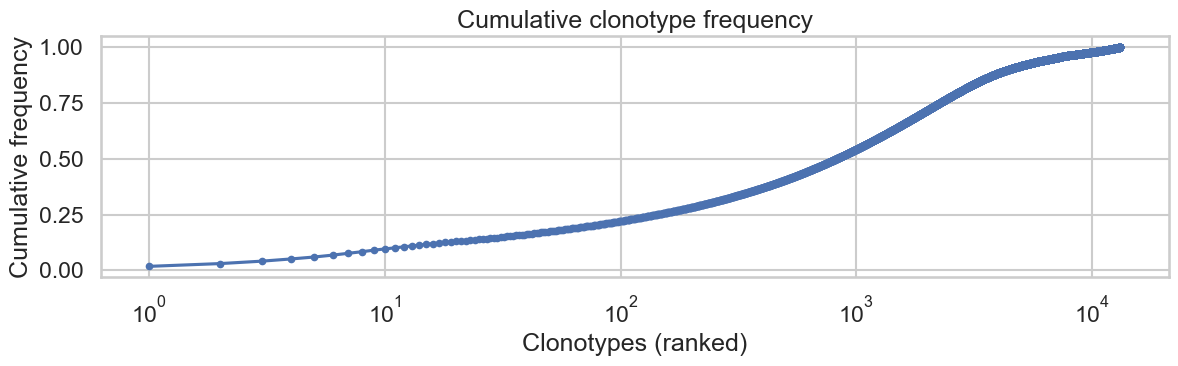

In [166]:
## Plot the cumultative frequency:
freqs = bcr_min.sort_values("count", ascending=False)["frequency"].values
cumfreq = freqs.cumsum()

sns.set_context("talk"); sns.set_style("whitegrid")    
plt.figure(figsize=(12,4))
plt.plot(range(1, len(cumfreq)+1), cumfreq, marker=".")
plt.xscale("log")  # log scale on x to see top clones clearly
plt.xlabel("Clonotypes (ranked)")
plt.ylabel("Cumulative frequency")
plt.title("Cumulative clonotype frequency")
plt.tight_layout()
# SAVE
plt.savefig(os.path.join(OUT_DIR, "cumulative_frequency.png"), dpi=300)
plt.show()
## Interpretation
## This cumulative frequency curve shows that the repertoire is quite diverse — no single clone dominates. 
# For example, the top 20 clonotypes together account for only about 30% of the repertoire. 
# In cases of clonal expansion, this curve would rise steeply at the beginning.

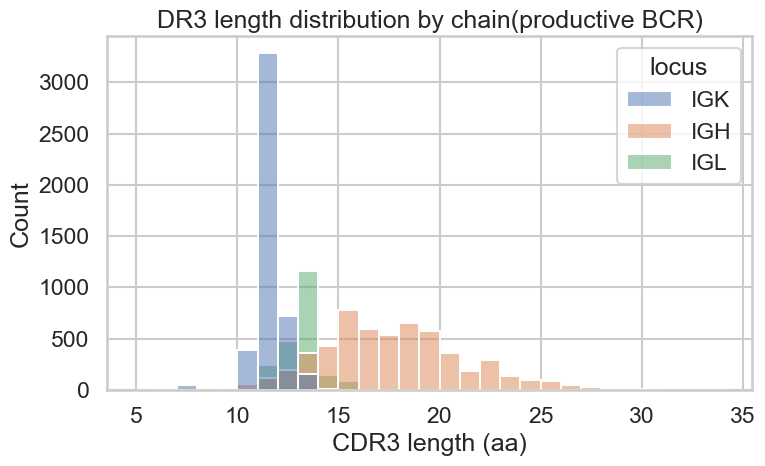

In [167]:
## CDR3 length distributions:

plt.figure(figsize=(8,5))
sns.histplot(data=bcr_min,x= bcr_min["CDR3aa"].str.len(), bins=range(5, 35), hue="locus")
plt.xlabel("CDR3 length (aa)")
plt.ylabel("Count")
plt.title("DR3 length distribution by chain(productive BCR)")
plt.tight_layout()
# SAVE
plt.savefig(os.path.join(OUT_DIR, "CDR3_length_distribution.png"), dpi=300)
plt.show()
## Interpratation 
# Here’s the CDR3 length distribution split by chain. As expected, heavy chains (blue) are longer and more variable, 
# while light chains (IGK in green, IGL in orange) cluster tightly around 11 amino acids.
# This matches known immunoglobulin biology and also reassures us that the repertoire assembly is accurate.


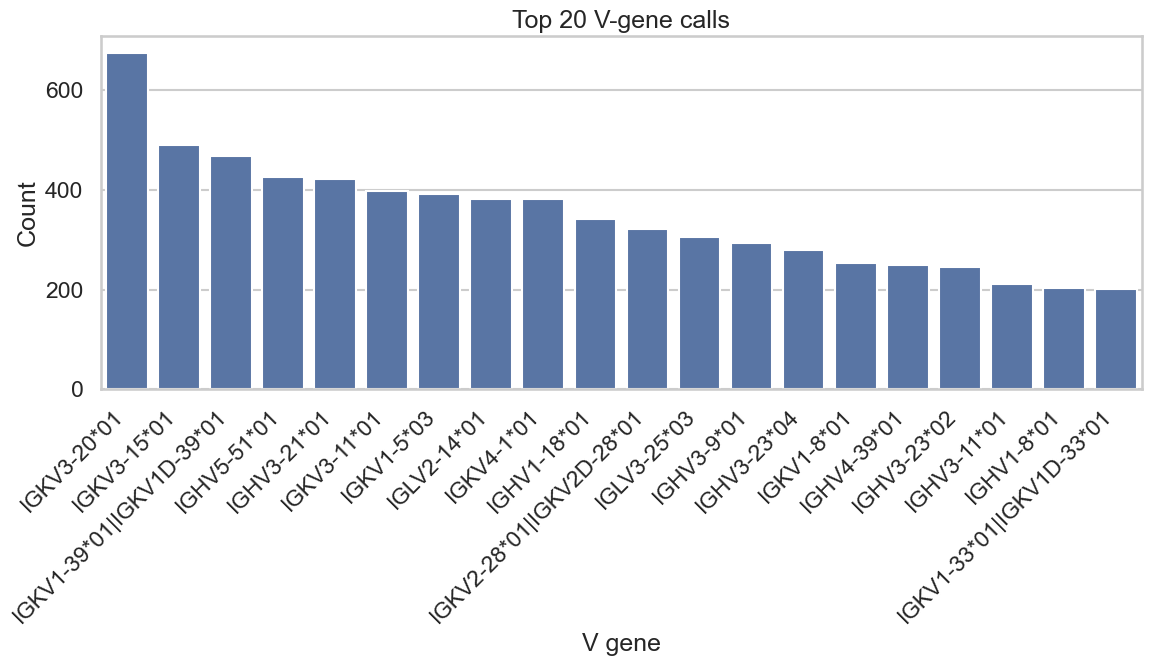

In [168]:
## V-gene usage (top 20)
v_count = bcr_min["V"].dropna().astype(str).str.split(",").str[0].value_counts().head(20).reset_index()
v_count.columns=["V_gene", "count"]
plt.figure(figsize=(12, 7))
sns.barplot(v_count, x="V_gene", y="count")
plt.xticks(rotation = 45, ha="right")
plt.xlabel("V gene")
plt.ylabel("Count")
plt.title("Top 20 V-gene calls")
plt.tight_layout()
# SAVE
plt.savefig(os.path.join(OUT_DIR, "Top_V_genes.png"), dpi=300)
plt.show()

In [169]:
## Clonal diversity metrics:
from scipy.stats import entropy
import numpy as np

# frequencies:
freqs = bcr_min["frequency"].values

# shannon entropy
shannon = entropy(freqs)

# simpson diversity
simpson = 1 - np.sum(freqs**2)

# Gini index
sorted_freqs = np.sort(freqs)
n = len(freqs)
gini = (2*np.sum((np.arange(1,n+1)*sorted_freqs)))/(n*np.sum(sorted_freqs)) - (n+1)/n
metrics = pd.DataFrame([{
    "sample": sample_ID,
    "n_clonotypes": n,
    "shannon_bits": shannon,
    "simpson": simpson,
    "gini": gini,
    "top1_freq": sorted_freqs[-1] if n else np.nan,
    "top10_cumfreq": sorted_freqs[-10:].sum() if n>=10 else sorted_freqs.sum()
}])

display(metrics.round(4))
metrics.to_csv(os.path.join(OUT_DIR, f"{sample_ID}_diversity_metrics.tsv"), sep="\t", index=False)
print("[saved] diversity metrics table")

,sample,n_clonotypes,shannon_bits,simpson,gini,top1_freq,top10_cumfreq
0,ERR13935197,13147,8.135,0.9986,0.7409,0.0177,0.0957


[saved] diversity metrics table


,category,count
0,rare(<0.01%),10598
1,small(0.01–0.1%),2488
2,medium(0.1–1%),58
3,expanded(>1%),3


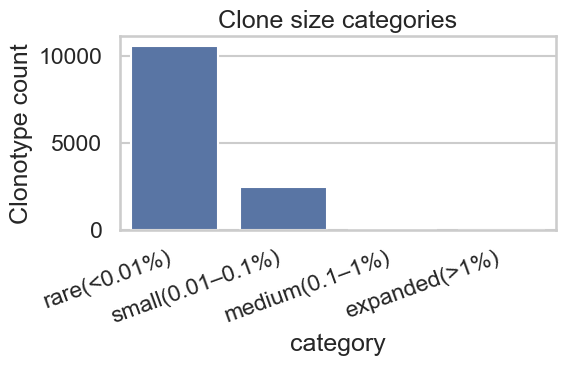

In [170]:
## bins in fraction of repertoire
bins = [0, 0.0001, 0.001, 0.01, 1.01]   # <0.01%, 0.01–0.1%, 0.1–1%, >1%
labels = ["rare(<0.01%)","small(0.01–0.1%)","medium(0.1–1%)","expanded(>1%)"]
cats = pd.cut(bcr_min["frequency"], bins=bins, labels=labels, include_lowest=True)
size_tab = cats.value_counts().reindex(labels).fillna(0).astype(int).reset_index()
size_tab.columns = ["category","count"]
display(size_tab)

fig = plt.figure(figsize=(6,4))
sns.barplot(size_tab, x="category", y="count")
plt.xticks(rotation=20, ha="right")
plt.ylabel("Clonotype count")
plt.title("Clone size categories")
plt.tight_layout()
# SAVE
plt.savefig(os.path.join(OUT_DIR, "Clonal_size.png"), dpi=300)
plt.show()

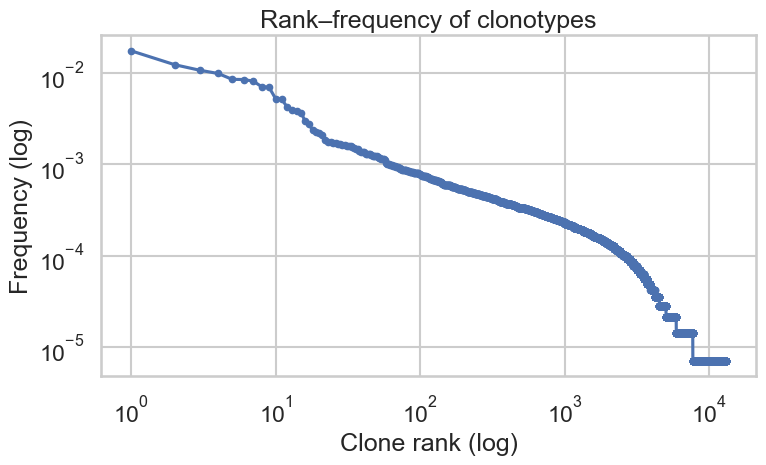

In [171]:
freqs_sorted = np.sort(bcr_min["frequency"].values)[::-1]
ranks = np.arange(1, len(freqs_sorted)+1)

fig = plt.figure(figsize=(8,5))
plt.plot(ranks, freqs_sorted, marker=".", linestyle="-")
plt.xscale("log"); plt.yscale("log")
plt.xlabel("Clone rank (log)")
plt.ylabel("Frequency (log)")
plt.title("Rank–frequency of clonotypes")
plt.tight_layout()
# SAVE
plt.savefig(os.path.join(OUT_DIR, "Rank-frequency.png"), dpi=300)
plt.show()

                               index  count              V                  J
0            (IGKV3-20*01, IGKJ1*01)     28    IGKV3-20*01           IGKJ1*01
1    (IGLV3-1*01, IGLJ2*01|IGLJ3*01)     27     IGLV3-1*01  IGLJ2*01|IGLJ3*01
2            (IGKV3-15*01, IGKJ1*01)     24    IGKV3-15*01           IGKJ1*01
3             (IGKV4-1*01, IGKJ1*01)     23     IGKV4-1*01           IGKJ1*01
4            (IGKV3-20*01, IGKJ2*01)     22    IGKV3-20*01           IGKJ2*01
..                               ...    ...            ...                ...
331        (IGHV5-10-1*02, IGHJ4*02)      1  IGHV5-10-1*02           IGHJ4*02
332          (IGHV3-20*01, IGHJ4*02)      1    IGHV3-20*01           IGHJ4*02
333          (IGHV5-51*01, IGHJ5*01)      1    IGHV5-51*01           IGHJ5*01
334         (IGLV10-54*01, IGLJ1*01)      1   IGLV10-54*01           IGLJ1*01
335           (IGKV1-5*01, IGKJ5*01)      1     IGKV1-5*01           IGKJ5*01

[336 rows x 4 columns]
998.0
J            IGHJ1*01  IGHJ2*01  I

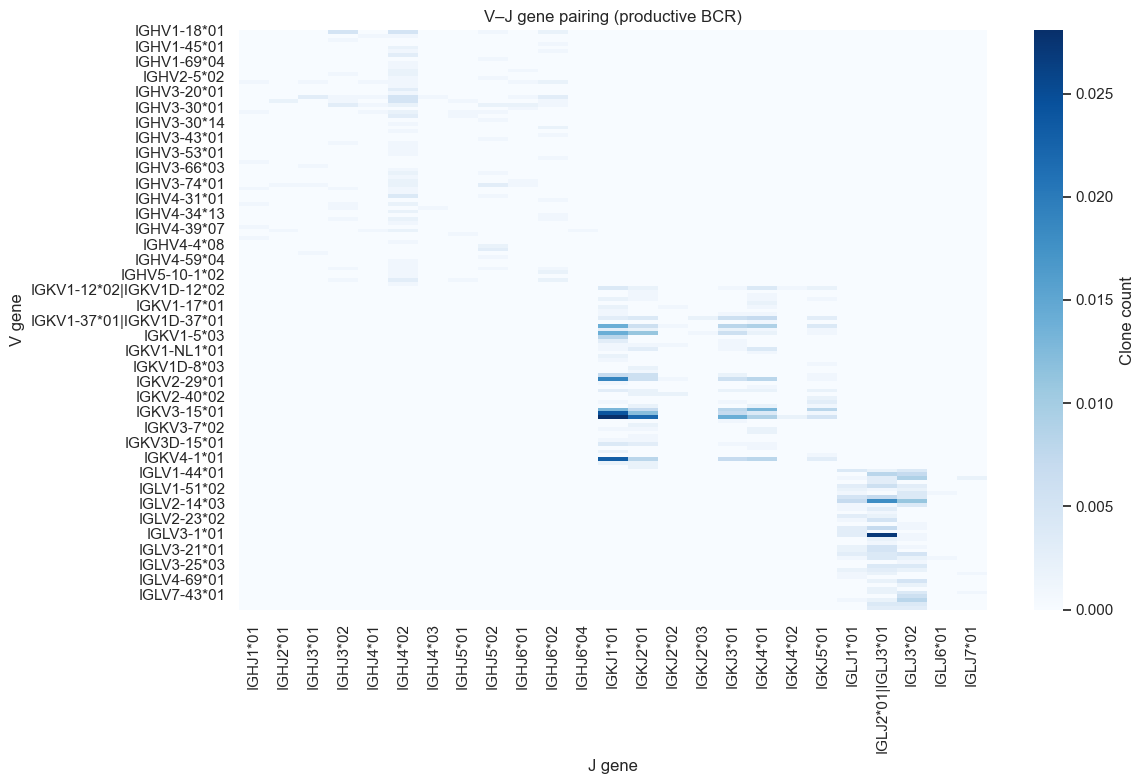

In [21]:
## V–J pairing heatmap
vj_pairs = (
    bcr_min[["V","J"]]
    .dropna()
    .astype(str)
    .apply(lambda x: (x["V"].split(",")[0], x["J"].split(",")[0]), axis=1)
    .value_counts()
    .reset_index(name="count")
)

vj_pairs[["V","J"]] = pd.DataFrame(vj_pairs["index"].tolist(), index=vj_pairs.index)
print(vj_pairs)
# Pivot into matrix
vj_matrix = vj_pairs.pivot_table(index="V", columns="J", values="count", fill_value=0)
## Normalize vj_matrix
total = vj_matrix.to_numpy().sum()
print(total)
if total > 0:
    vj_matrix_norm = vj_matrix / total
print(vj_matrix)
print(vj_matrix_norm)
plt.figure(figsize=(12,8))
sns.heatmap(vj_matrix_norm, cmap="Blues", cbar_kws={"label":"Clone count"})
plt.title("V–J gene pairing (productive BCR)")
plt.xlabel("J gene")
plt.ylabel("V gene")
plt.tight_layout()
# SAVE
plt.savefig(os.path.join(OUT_DIR, "VJ_gene_pairing_normalized.png"), dpi=300)
plt.show()

  isotype  count
0   IGHA1   1636
1    IGHM   1111
2   IGHG1   1069
3    IGHD    216
4   IGHA2    212
5   IGHG3    153
6   IGHG2    137
7   IGHG4     20
8    IGHE      1


/var/folders/4s/wx09w0ds5d940ckz581cf9mr0000gn/T/ipykernel_20510/3540238229.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(isotypes, x="isotype", y="count", palette="muted")


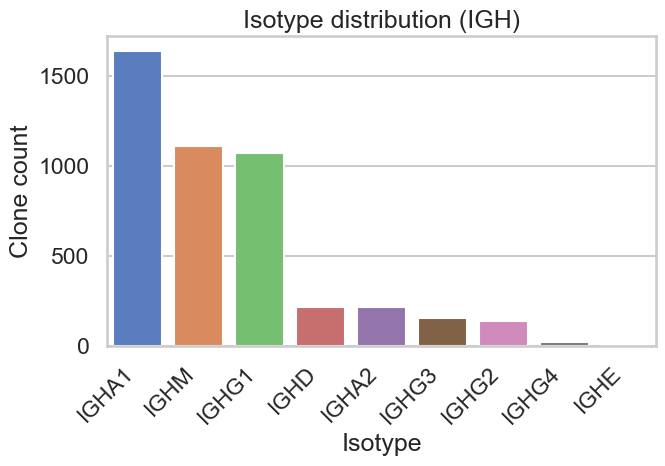

In [174]:
## Isotype usage (heavy chain only)
isotypes = (
    bcr_min[bcr_min["locus"] == "IGH"]["C"]
    .dropna()
    .astype(str)
    .str.split(",").str[0]
    .value_counts()
    .reset_index()
)
isotypes.columns = ["isotype", "count"]
print(isotypes)
plt.figure(figsize=(7,5))
sns.barplot(isotypes, x="isotype", y="count", palette="muted")
plt.title("Isotype distribution (IGH)")
plt.ylabel("Clone count")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Isotype")
plt.tight_layout()
# SAVE
plt.savefig(os.path.join(OUT_DIR, "Isotype_distribution.png"), dpi=300)
plt.show()
